In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy.random import default_rng

In [2]:
rng = default_rng()
def roll_die(n_sides: int) -> int:
    return rng.integers(low=1, high=n_sides + 1, size=1, dtype=int)[0]
roll_die(100)

98

In [3]:
def print_roll(roll: int, count: int):
    print(f'Last Roll: {roll} | Count: {count}')

In [4]:
def run_simulation(start_val: int = 100, do_print: bool = True):
    rolls = []
    last_roll = roll_die(start_val)
    count = 1
    if do_print:
        print_roll(last_roll, count)
    rolls.append(last_roll)
    while last_roll != 1:
        last_roll = roll_die(last_roll)
        count += 1
        if do_print:
            print_roll(last_roll, count)
        rolls.append(last_roll)
    return rolls

In [5]:
run_simulation()

Last Roll: 91 | Count: 1
Last Roll: 17 | Count: 2
Last Roll: 1 | Count: 3


[91, 17, 1]

In [6]:
n_sims = 1000
start_val = 200
sims = [run_simulation(start_val=start_val, do_print=False) for _ in range(n_sims)]
np.mean([len(sim) for sim in sims])

6.705

In [7]:
sim_data = [{'sim_n': i, 'data': sim, 'count': len(sim), 'start_val': start_val} for i, sim in enumerate(sims)]
sim_data[:5]

[{'sim_n': 0, 'data': [111, 68, 15, 7, 5, 3, 1], 'count': 7, 'start_val': 200},
 {'sim_n': 1,
  'data': [37, 10, 10, 7, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1],
  'count': 15,
  'start_val': 200},
 {'sim_n': 2, 'data': [11, 6, 6, 2, 1], 'count': 5, 'start_val': 200},
 {'sim_n': 3, 'data': [99, 27, 16, 2, 1], 'count': 5, 'start_val': 200},
 {'sim_n': 4,
  'data': [124, 44, 19, 11, 7, 3, 3, 3, 2, 2, 1],
  'count': 11,
  'start_val': 200}]

In [8]:
df = pd.DataFrame.from_records(sim_data)
df.head()

,sim_n,data,count,start_val
0,0,"[111, 68, 15, 7, 5, 3, 1]",7,200
1,1,"[37, 10, 10, 7, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1]",15,200
2,2,"[11, 6, 6, 2, 1]",5,200
3,3,"[99, 27, 16, 2, 1]",5,200
4,4,"[124, 44, 19, 11, 7, 3, 3, 3, 2, 2, 1]",11,200


In [9]:
df['count'].describe()

count    1000.000000
mean        6.705000
std         2.751281
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        17.000000
Name: count, dtype: float64

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

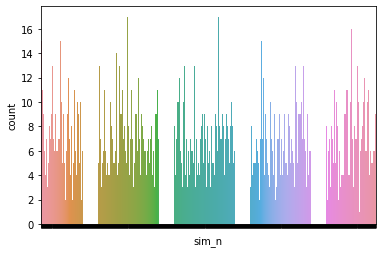

In [10]:
ax = sns.barplot(data=df, x='sim_n', y='count')
ax.set(xticklabels=[])

In [25]:
df['first_roll'] = [l[0] for l in df['data']]
df = df.sort_values(by='count')
df.head()

,sim_n,data,count,start_val,first_roll,unlucky
654,654,[1],1,200,1,True
911,911,[1],1,200,1,True
780,780,[1],1,200,1,True
951,951,[1],1,200,1,True
77,77,[1],1,200,1,True


In [18]:
df['first_roll'].describe()

count    1000.000000
mean      100.231000
std        58.957473
min         1.000000
25%        50.000000
50%       101.500000
75%       151.000000
max       200.000000
Name: first_roll, dtype: float64

In [22]:
df['unlucky'] = df['first_roll'] == 1
df.head()

,sim_n,data,count,start_val,first_roll,unlucky
0,0,"[111, 68, 15, 7, 5, 3, 1]",7,200,111,False
1,1,"[37, 10, 10, 7, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1]",15,200,37,False
2,2,"[11, 6, 6, 2, 1]",5,200,11,False
3,3,"[99, 27, 16, 2, 1]",5,200,99,False
4,4,"[124, 44, 19, 11, 7, 3, 3, 3, 2, 2, 1]",11,200,124,False


In [23]:
df[df['unlucky']].shape

(8, 6)

<AxesSubplot:xlabel='sim_n', ylabel='first_roll'>

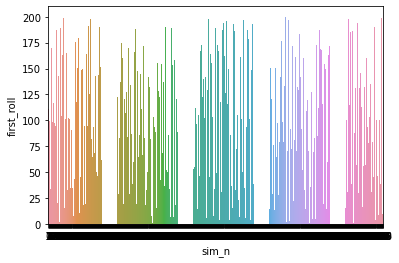

In [26]:
sns.barplot(data=df, x='sim_n', y='first_roll')